In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Eff.csv')

In [4]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
data.shape

(768, 10)

In [6]:
data.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

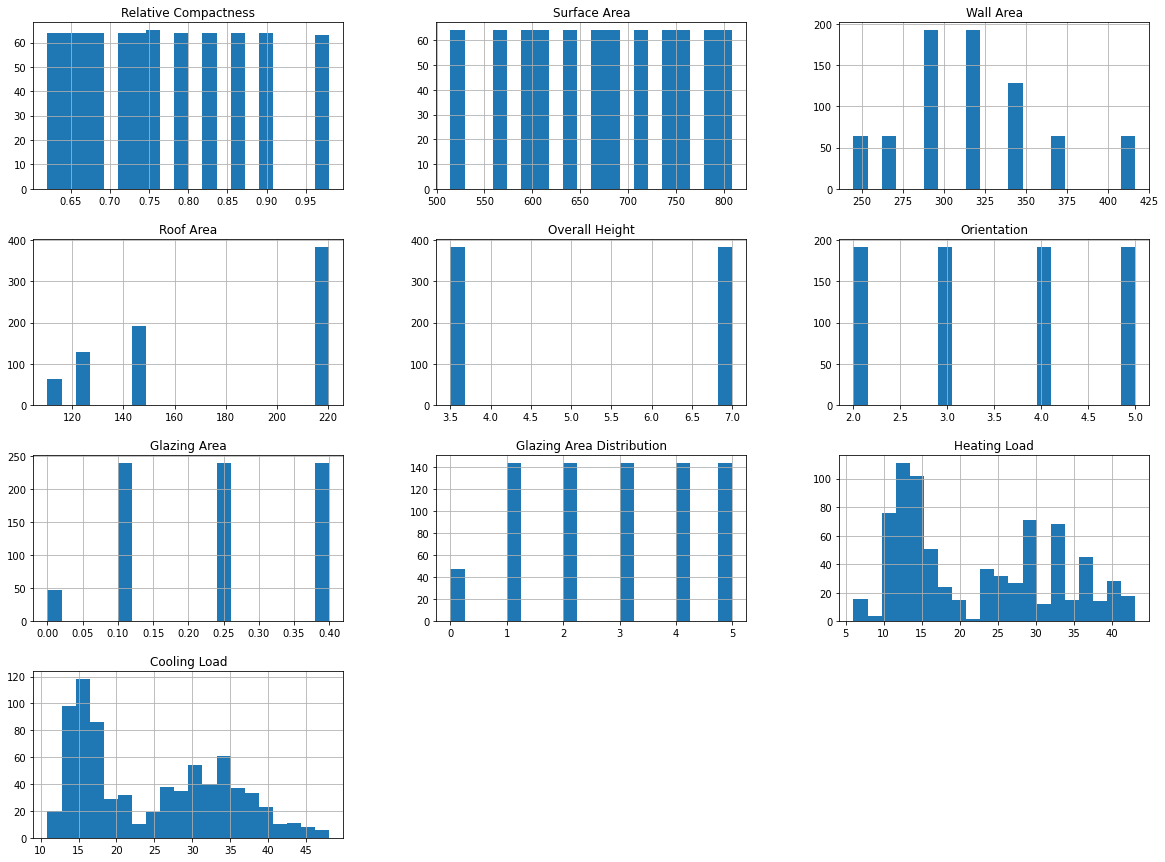

In [7]:
data.hist(bins=20, figsize=(20,15))
plt.show()

In [8]:
import plotly.express as px
yprop = 'Surface Area'
xprop = 'Cooling Load'
h= None
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [9]:
import plotly.express as px
yprop = 'Overall Height'
xprop = 'Heating Load'
h= None
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

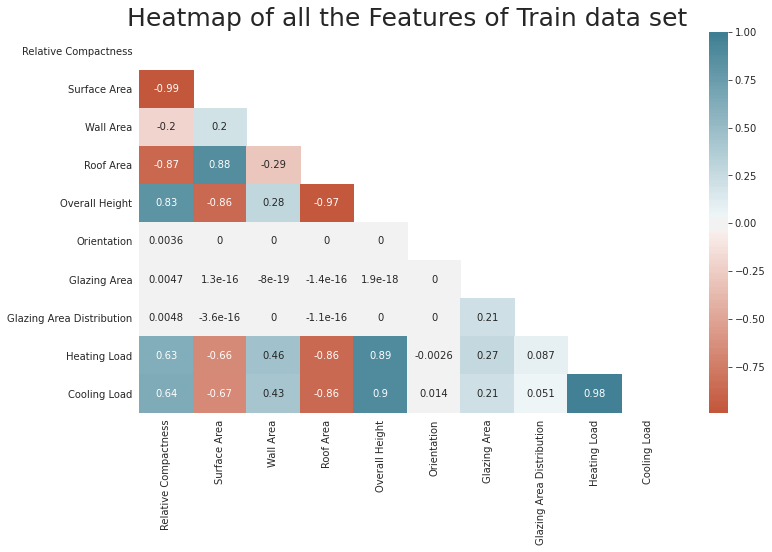

In [10]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

In [11]:
from scipy.stats import randint as sp_randint
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.models import Sequential
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

In [12]:
X = data[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
Y = data[['Heating Load', 'Cooling Load']]
Y1= data[['Heating Load']]
Y2= data[['Cooling Load']]

In [13]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, Y1, Y2, test_size=0.33, random_state = 20)

MinMax = MinMaxScaler(feature_range= (0,1))
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

In [14]:
Acc = pd.DataFrame(index=None, columns=['model','train_Heating','test_Heating','train_Cooling','test_Cooling'])

In [15]:
regressors = [['SVR',SVR()],
              
              ['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['KNeighborsRegressor', KNeighborsRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['GradientBoostingRegressor',GradientBoostingRegressor()]]

In [16]:
for mod in regressors:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y1_train)
    actr1 = r2_score(y1_train, model.predict(X_train))
    acte1 = r2_score(y1_test, model.predict(X_test))
    
    model.fit(X_train,y2_train)
    actr2 = r2_score(y2_train, model.predict(X_train))
    acte2 = r2_score(y2_test, model.predict(X_test))
    
    Acc = Acc.append(pd.Series({'model':name, 'train_Heating':actr1,'test_Heating':acte1,'train_Cooling':actr2,'test_Cooling':acte2}),ignore_index=True )
Acc.sort_values(by='test_Cooling')

,model,train_Heating,test_Heating,train_Cooling,test_Cooling
4,MLPRegressor,0.872329,0.877098,0.809424,0.830457
0,SVR,0.930662,0.910593,0.892578,0.887385
2,KNeighborsRegressor,0.946098,0.904272,0.926993,0.888316
5,AdaBoostRegressor,0.968448,0.964007,0.936370,0.933946
1,DecisionTreeRegressor,1.000000,0.997223,1.000000,0.950263
3,RandomForestRegressor,0.999492,0.997454,0.995555,0.965203
6,GradientBoostingRegressor,0.998173,0.997641,0.979423,0.976044


In [17]:
DTR = DecisionTreeRegressor()
param_grid = {"criterion": ["mse", "mae"],"min_samples_split": [14, 15, 16, 17],
              "max_depth": [5, 6, 7],"min_samples_leaf": [4, 5, 6],"max_leaf_nodes": [29, 30, 31, 32],}

grid_cv_DTR = GridSearchCV(DTR, param_grid, cv=5)

grid_cv_DTR.fit(X_train,y2_train)
print("R-Squared::{}".format(grid_cv_DTR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_DTR.best_params_))

R-Squared::0.9599150110108299
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 32, 'min_samples_leaf': 5, 'min_samples_split': 17}


In [18]:
DTR = DecisionTreeRegressor(criterion= 'mse', max_depth= 6, max_leaf_nodes= 30, min_samples_leaf= 5, min_samples_split= 17)

DTR.fit(X_train,y1_train)
print("R-Squared on train dataset={}".format(DTR.score(X_test,y1_test)))

DTR.fit(X_train,y2_train)   
print("R-Squaredon test dataset={}".format(DTR.score(X_test,y2_test)))

R-Squared on train dataset=0.9951682175001316
R-Squaredon test dataset=0.959111514640551


In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [350, 400, 450], 'max_features': [1, 2], 'max_depth': [85, 90, 95]}]

RFR = RandomForestRegressor(n_jobs=-1)
grid_search_RFR = GridSearchCV(RFR, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_RFR.fit(X_train, y2_train)

print("R-Squared::{}".format(grid_search_RFR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_RFR.best_params_))

R-Squared::-2.6923537790662495
Best Hyperparameters::
{'max_depth': 90, 'max_features': 1, 'n_estimators': 400}


In [20]:
RFR = RandomForestRegressor(n_estimators = 450, max_features = 1, max_depth= 90, bootstrap= True)

RFR.fit(X_train,y1_train)
print("R-Squared on train dataset={}".format(RFR.score(X_test,y1_test)))

RFR.fit(X_train,y2_train)   
print("R-Squaredon test dataset={}".format(RFR.score(X_test,y2_test)))

R-Squared on train dataset=0.9912013360948474
R-Squaredon test dataset=0.9742945258801485


In [21]:
param_grid = [{"learning_rate": [0.01, 0.02, 0.1], "n_estimators":[150, 200, 250], "max_depth": [4, 5, 6], 
 "min_samples_split":[1, 2, 3], "min_samples_leaf":[2, 3], "subsample":[1.0, 2.0]}]

GBR = GradientBoostingRegressor()
grid_search_GBR = GridSearchCV(GBR, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_GBR.fit(X_train, y2_train)

print("R-Squared::{}".format(grid_search_GBR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_GBR.best_params_))

R-Squared::-1.0983184291987176
Best Hyperparameters::
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 250, 'subsample': 1.0}


In [22]:
GBR = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250, max_depth=5, min_samples_split=3, min_samples_leaf=2, subsample=1.0)

GBR.fit(X_train,y1_train)
print("R-Squared on train dataset={}".format(GBR.score(X_test,y1_test)))

GBR.fit(X_train,y2_train)   
print("R-Squaredon test dataset={}".format(GBR.score(X_test,y2_test)))

R-Squared on train dataset=0.9986725239252359
R-Squaredon test dataset=0.9915762746604587


In [23]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

model_CBR = CatBoostRegressor()
parameters = {'depth':[8, 10],'iterations':[10000],'learning_rate':[0.02,0.03],
              'border_count':[5],'random_state': [42, 45]}

grid = GridSearchCV(estimator=model_CBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y2_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

0:	learn: 9.3689584	total: 46.6ms	remaining: 7m 46s
1:	learn: 9.2169090	total: 46.8ms	remaining: 3m 54s
2:	learn: 9.0718381	total: 47.1ms	remaining: 2m 36s
3:	learn: 8.9143211	total: 47.4ms	remaining: 1m 58s
4:	learn: 8.7665524	total: 47.7ms	remaining: 1m 35s
5:	learn: 8.6316242	total: 47.9ms	remaining: 1m 19s
6:	learn: 8.4889593	total: 48.2ms	remaining: 1m 8s
7:	learn: 8.3500333	total: 48.6ms	remaining: 1m
8:	learn: 8.2288271	total: 49ms	remaining: 54.4s
9:	learn: 8.0896629	total: 49.4ms	remaining: 49.3s
10:	learn: 7.9602766	total: 49.6ms	remaining: 45s
11:	learn: 7.8410353	total: 49.7ms	remaining: 41.4s
12:	learn: 7.7179641	total: 50.1ms	remaining: 38.5s
13:	learn: 7.5928102	total: 50.4ms	remaining: 36s
14:	learn: 7.4809500	total: 50.6ms	remaining: 33.7s
15:	learn: 7.3581992	total: 50.9ms	remaining: 31.7s
16:	learn: 7.2484208	total: 51.1ms	remaining: 30s
17:	learn: 7.1437809	total: 51.3ms	remaining: 28.5s
18:	learn: 7.0286401	total: 51.9ms	remaining: 27.3s
19:	learn: 6.9222189	total:

In [24]:
MLPR = MLPRegressor(hidden_layer_sizes = [180,100,20],activation ='relu', solver='lbfgs',max_iter = 10000,random_state = 0)
MLPR.fit(X_train,y1_train)
print("R-Squared on train dataset={}".format(MLPR.score(X_test,y1_test)))

MLPR.fit(X_train,y2_train)   
print("R-Squaredon test dataset={}".format(MLPR.score(X_test,y2_test)))

R-Squared on train dataset=0.9962450295106783
R-Squaredon test dataset=0.9902336660399562


In [25]:
Acc1 = pd.DataFrame(index=None, columns=['model','train_Heating','test_Heating','train_Cooling','test_Cooling'])

In [26]:
regressors1 = [['DecisionTreeRegressor',DecisionTreeRegressor(criterion= 'mse', max_depth= 6, max_leaf_nodes= 30, min_samples_leaf= 5, min_samples_split= 17)],
              ['RandomForestRegressor', RandomForestRegressor(n_estimators = 450, max_features = 1, max_depth= 90, bootstrap= True)],
              ['MLPRegressor',MLPRegressor(hidden_layer_sizes = [180,100,20],activation ='relu', solver='lbfgs',max_iter = 10000,random_state = 0)],
              ['GradientBoostingRegressor',GradientBoostingRegressor(learning_rate=0.1,n_estimators=250, max_depth=5, min_samples_split=2, min_samples_leaf=3, subsample=1.0)]]

In [27]:
for mod in regressors1:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y1_train)
    actr1 = r2_score(y1_train, model.predict(X_train))
    acte1 = r2_score(y1_test, model.predict(X_test))
    
    model.fit(X_train,y2_train)
    actr2 = r2_score(y2_train, model.predict(X_train))
    acte2 = r2_score(y2_test, model.predict(X_test))
    
    Acc1 = Acc1.append(pd.Series({'model':name, 'train_Heating':actr1,'test_Heating':acte1,'train_Cooling':actr2,'test_Cooling':acte2}),ignore_index=True )
Acc1.sort_values(by='test_Cooling')

,model,train_Heating,test_Heating,train_Cooling,test_Cooling
0,DecisionTreeRegressor,0.994803,0.995168,0.967655,0.959112
1,RandomForestRegressor,0.998713,0.991088,0.996212,0.974241
2,MLPRegressor,0.999779,0.996245,0.999415,0.990234
3,GradientBoostingRegressor,0.999735,0.998554,0.998988,0.991897


In [28]:
model = CatBoostRegressor(border_count= 5, depth= 8, iterations= 10000, learning_rate= 0.02, random_state= 45)

model.fit(X_train,y1_train)
actr1 = r2_score(y1_train, model.predict(X_train))
acte1 = r2_score(y1_test, model.predict(X_test))
y1_pred = model.predict(X_test)

model.fit(X_train,y2_train)
actr2 = r2_score(y2_train, model.predict(X_train))
acte2 = r2_score(y2_test, model.predict(X_test))
y2_pred = model.predict(X_test)

0:	learn: 9.8868429	total: 411us	remaining: 4.12s
1:	learn: 9.7188971	total: 1.26ms	remaining: 6.3s
2:	learn: 9.5592097	total: 1.85ms	remaining: 6.16s
3:	learn: 9.3964811	total: 2.41ms	remaining: 6.01s
4:	learn: 9.2407651	total: 2.98ms	remaining: 5.95s
5:	learn: 9.0908929	total: 3.62ms	remaining: 6.03s
6:	learn: 8.9504968	total: 3.98ms	remaining: 5.68s
7:	learn: 8.8124133	total: 4.36ms	remaining: 5.44s
8:	learn: 8.6723284	total: 4.73ms	remaining: 5.25s
9:	learn: 8.5305257	total: 5.09ms	remaining: 5.08s
10:	learn: 8.4026681	total: 5.47ms	remaining: 4.96s
11:	learn: 8.2640517	total: 5.99ms	remaining: 4.99s
12:	learn: 8.1426196	total: 6.42ms	remaining: 4.93s
13:	learn: 8.0317549	total: 7.06ms	remaining: 5.04s
14:	learn: 7.9083174	total: 7.51ms	remaining: 5s
15:	learn: 7.7818955	total: 8.21ms	remaining: 5.12s
16:	learn: 7.6635387	total: 8.55ms	remaining: 5.02s
17:	learn: 7.5430414	total: 8.83ms	remaining: 4.9s
18:	learn: 7.4164281	total: 9.54ms	remaining: 5.01s
19:	learn: 7.3004074	total: 

In [29]:
print("CatBoostRegressor: R-Squared on train dataset={}".format(actr1))
print("CatBoostRegressor: R-Squared on test dataset={}".format(acte1))
print("CatBoostRegressor: R-Squared on train dataset={}".format(actr2))
print("CatBoostRegressor: R-Squared on test dataset={}".format(acte2))

CatBoostRegressor: R-Squared on train dataset=0.9999999434019238
CatBoostRegressor: R-Squared on test dataset=0.9988455949094693
CatBoostRegressor: R-Squared on train dataset=0.9999996960556436
CatBoostRegressor: R-Squared on test dataset=0.9943841466012513


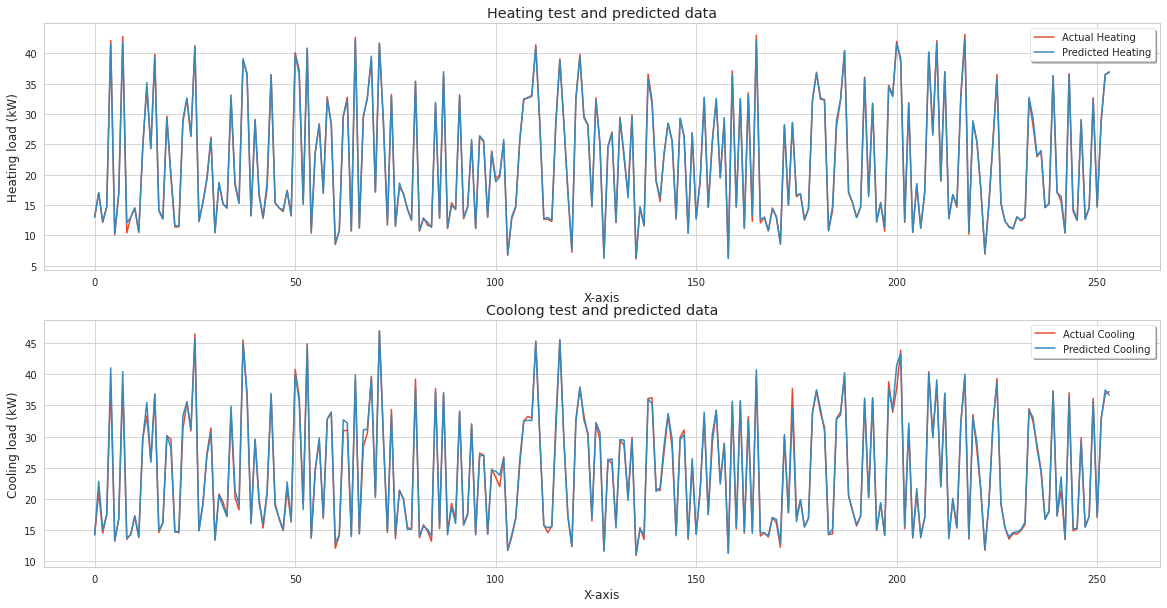

In [30]:
x_ax = range(len(y1_test))
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(x_ax, y1_test, label="Actual Heating")
plt.plot(x_ax, y1_pred, label="Predicted Heating")
plt.title("Heating test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Heating load (kW)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(x_ax, y2_test, label="Actual Cooling")
plt.plot(x_ax, y2_pred, label="Predicted Cooling")
plt.title("Coolong test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Cooling load (kW)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

plt.show()

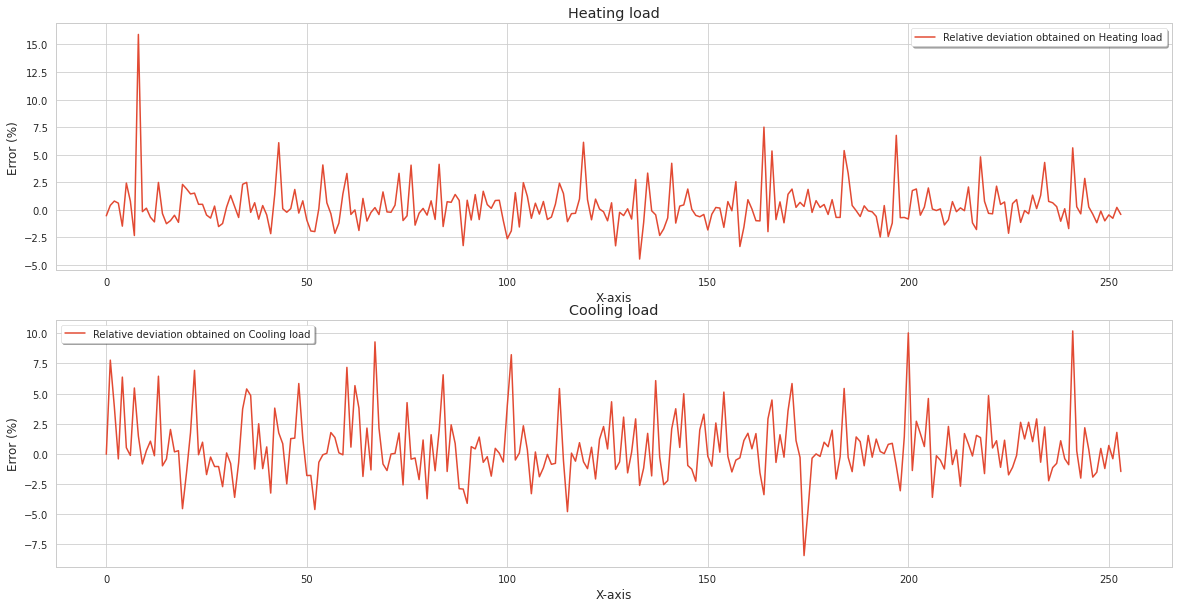

In [31]:
def AAD(y1_test, y1_pred):
    AAD =[]
    for i in range(len(y1_pred)):
        AAD.append((y1_pred[i] - y1_test.values[i])/y1_test.values[i]*100)
    return AAD

x_ax = range(len(y1_test))
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(x_ax, AAD(y1_test, y1_pred), label="Relative deviation obtained on Heating load")
plt.title("Heating load")
plt.xlabel('X-axis')
plt.ylabel('Error (%)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(x_ax, AAD(y2_test, y2_pred), label="Relative deviation obtained on Cooling load")
plt.title("Cooling load")
plt.xlabel('X-axis')
plt.ylabel('Error (%)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

plt.show()